<a href="https://colab.research.google.com/github/mjkimcs/portfolio/blob/main/22c_Airbnb_%EC%88%99%EB%B0%95%EB%A3%8C%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    id: 항목의 ID
    name: 항목의 이름 (타이틀)
    host_id: 호스트 ID
    host_name: 호스트의 이름
    neighbourhood_group: 방이 있는 구역 그룹
    neighbourhood: 방이 있는 구역
    latitude: 방이 위치한 위도
    longitude: 방이 위치한 경도
    room_type: 방의 종류
    price: 가격 (미 달러)
    minimum_nights: 최소 숙박 일수
    number_of_reviews: 리뷰의 개수
    last_review: 마지막 리뷰 일자
    reviews_per_month: 월별 리뷰 개수
    calculated_host_listings_count: 호스트가 올린 방 개수
    availability_365: 365일 중 가능한 일수

    
- 데이터 출처: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

## 최종 목표
    - 하나의 열 안에 항목이 많을 경우 줄여주기
    - outlier 제거
    - 미기입 데이터 처리

## Regression
 - 선형회귀(linear)
 - 그 외 회귀: Gradient Boosting

**XGBoost**
- 모듈 이름
- Extreme(병렬) Gradient Boosting
- Gradient Boosting이라는 머신러닝 알고리즘을 병렬(일을 빨리 처리)로 학습할 수 있게 만들어놓은 모듈
---
**Gradient Boosting**
- Boosting 알고리즘 한 종류
- A 모델의 부족한 부분을 B 모델을 학습시킬 때 Gradient descent(경사하강법)라는 알고리즘을 사용
---
**Boosting**
- 여러 개의 알고리즘을 사용하여 성능을 높이는 알고리즘
      A 라는 머신러닝 알고리즘으로 학습 후
      A 모델이 예측에 실패한 데이터를 갖고
      완전히 다른 B 모델로 학습을 시킴
      B 모델이 예측에 실패한 데이터를 갖고
      C 모델을 학습시키며 모델의 정확도를 높임
---
**LightGBM**
- XGBoost 의 업그레이드 버전
- Light Gradient Boosting algorithM
- 학습이 더 빠르고, 메모리도 더 적게 사용하는 모듈
- 학습 모델의 성능에는 차이가 없음

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os

In [ ]:
os.environ['KAGGLE_USERNAME'] = 'mjkimcs'
os.environ['KAGGLE_KEY'] = '47adf959b8d9d52a7332fb2dff639854'

In [ ]:
!rm *.*
!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data
!unzip '*.zip'

  0% 0.00/2.44M [00:00<?, ?B/s]
100% 2.44M/2.44M [00:00<00:00, 80.9MB/s]
Archive:  new-york-city-airbnb-open-data.zip
  inflating: AB_NYC_2019.csv         
  inflating: New_York_City_.png      


In [ ]:
df = pd.read_csv('AB_NYC_2019.csv')

In [ ]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


## EDA

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df['reviews_per_month'].isna()

0        False
1        False
2         True
3        False
4        False
         ...  
48890     True
48891     True
48892     True
48893     True
48894     True
Name: reviews_per_month, Length: 48895, dtype: bool

In [ ]:
# 서로 완전히 겹치는지 확인
# 둘 다 True여야 True

( df['reviews_per_month'].isna() & df['last_review'].isna() ).sum()

10052

In [ ]:
(df['number_of_reviews'] == 0).sum()

10052

In [ ]:
( df['number_of_reviews'] == 0 & df['reviews_per_month'].isna() ).sum()

10052

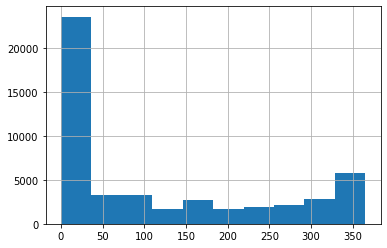

In [ ]:
df['availability_365'].hist();

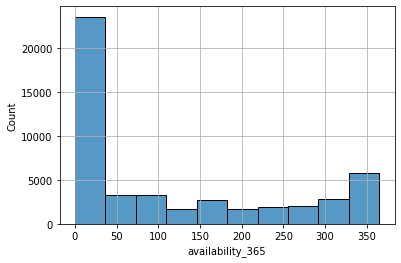

In [ ]:
sns.histplot(x='availability_365', data=df, bins=10)
plt.grid()

In [ ]:
(df['availability_365'] == 0).sum()

# 0인 것이 많아서 0은 그냥 숫자를 넣지 않은 것으로 판단됨

17533

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df.drop(['id', 'name', 'host_name', 'latitude', 'longitude'], axis=1, inplace=True)

In [ ]:
df.head()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,4632,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### 수치형 데이터와 Price의 Jointplot

In [ ]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

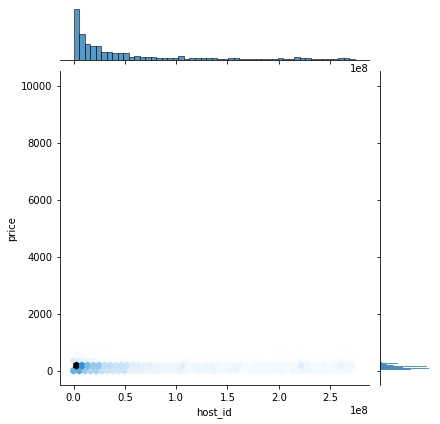

In [ ]:
sns.jointplot(x='host_id', y='price', data=df, kind='hex')

# 몰려있어서 분석이 어려움. host_id 데이터 클리닝이 필요함.

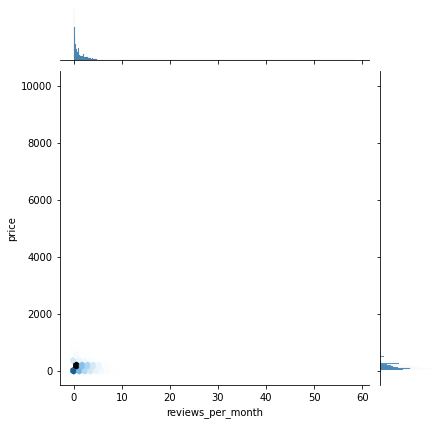

In [ ]:
sns.jointplot(x='reviews_per_month', y='price', data=df, kind='hex')

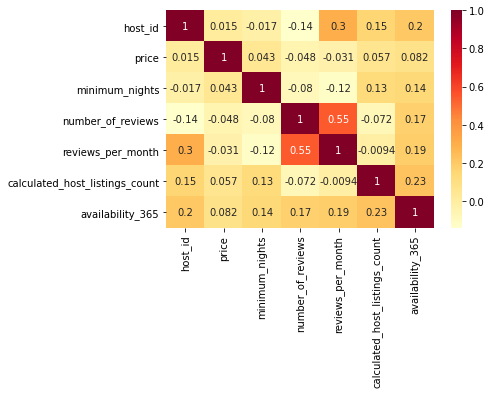

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='YlOrRd')

# 아웃라이어가 제거되지 않은 상태이기 때문에 price와의 연관성이 적어보임

### 범주형 데이터와 Price의 Boxplot

In [ ]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

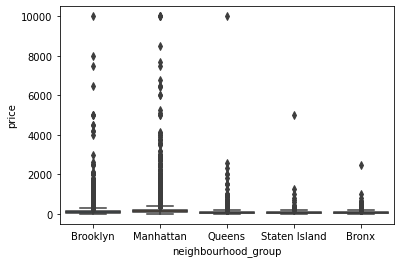

In [ ]:
sns.boxplot(x='neighbourhood_group', y='price', data=df)

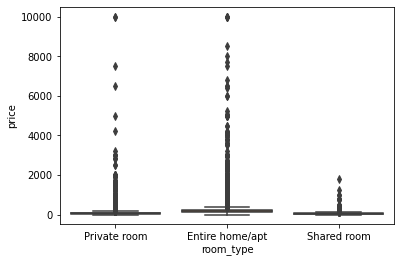

In [ ]:
sns.boxplot(x='room_type', y='price', data=df)

# 아웃라이어가 많아서 데이터 클리닝이 필요

## 데이터 클리닝

In [ ]:
df.isna().sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

### 하나의 열 안에 항목이 많을 경우 줄여주기

In [ ]:
df['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Willowbrook              1
New Dorp                 1
Richmondtown             1
Woodrow                  1
Rossville                1
Name: neighbourhood, Length: 221, dtype: int64

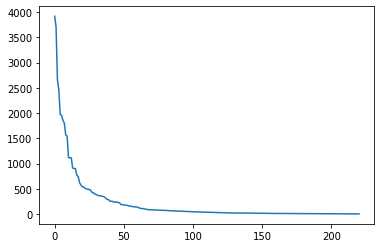

In [ ]:
n = df['neighbourhood'].value_counts()
plt.plot(range(len(n)), n)

In [ ]:
df['neighbourhood'] = df['neighbourhood'].apply(lambda s: s if str(s) not in n[50:] else 'others')
df['neighbourhood'].value_counts()

others                       6248
Williamsburg                 3920
Bedford-Stuyvesant           3714
Harlem                       2658
Bushwick                     2465
Upper West Side              1971
Hell's Kitchen               1958
East Village                 1853
Upper East Side              1798
Crown Heights                1564
Midtown                      1545
East Harlem                  1117
Greenpoint                   1115
Chelsea                      1113
Lower East Side               911
Astoria                       900
Washington Heights            899
West Village                  768
Financial District            744
Flatbush                      621
Clinton Hill                  572
Long Island City              537
Prospect-Lefferts Gardens     535
Park Slope                    506
East Flatbush                 500
Fort Greene                   489
Murray Hill                   485
Kips Bay                      470
Flushing                      426
Ridgewood     

In [ ]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

### 한쪽으로 값이 몰려있는 경우 quantile을 봐서 outlier 제거

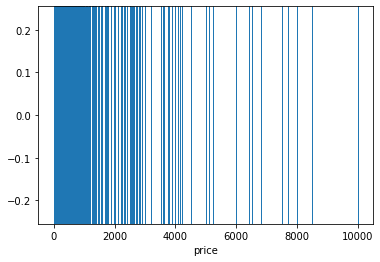

In [ ]:
sns.rugplot(x='price', data=df, height=1)

In [ ]:
# price가 상위 5%인 것과 0인 것은 제거

print(df['price'].quantile(0.95))
print(df['price'].quantile(0.005))

355.0
26.0


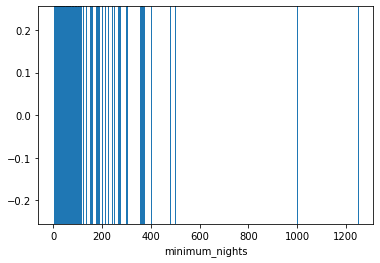

In [ ]:
sns.rugplot(x='minimum_nights', data=df, height=1)

In [ ]:
print(df['minimum_nights'].quantile(0.98))

30.0


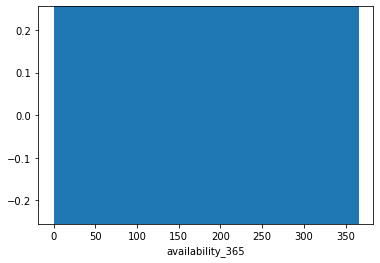

In [ ]:
sns.rugplot(x='availability_365', data=df, height=1)

In [ ]:
print(df['availability_365'].quantile(0.37))

2.0


In [ ]:
# outlier 제거
p1 = df['price'].quantile(0.95)
p2 = df['price'].quantile(0.005)
print(p1, p2)

355.0 26.0


In [ ]:
df = df[(df['price'] < p1) & (df['price'] > p2)]

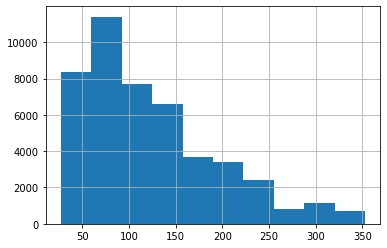

In [ ]:
df['price'].hist()

In [ ]:
mn1 = df['minimum_nights'].quantile(0.98)
print(mn1)

30.0


In [ ]:
df = df[df['minimum_nights'] < mn1]

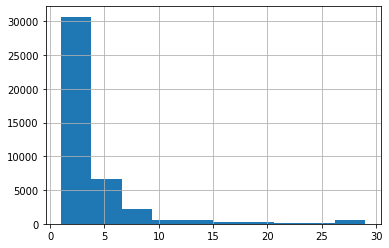

In [ ]:
df['minimum_nights'].hist()

### 필요한 컬럼 추가

In [ ]:
# availability_365가 0 이거나 아닌 것 따로 컬럼 만들기
df['is_avail_zero'] = df['availability_365'].apply(lambda x: 'Zero' if x==0 else 'Nonzero')

### 미기입 데이터 처리

In [ ]:
df['review_exists'] = df['reviews_per_month'].isna().apply(lambda x: 'No' if x is True else 'Yes')
df['review_exists']

0        Yes
1        Yes
2        Yes
3        Yes
4        Yes
        ... 
48890    Yes
48891    Yes
48892    Yes
48893    Yes
48894    Yes
Name: review_exists, Length: 41980, dtype: object

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.isna().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
is_avail_zero                     0
review_exists                     0
dtype: int64

## 모델 학습을 위한 데이터 전처리 

### 범주형 데이터 전처리: get_dummies

In [ ]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'is_avail_zero', 'review_exists'],
      dtype='object')

In [ ]:
# one-hot 벡터
X_cat = df[['neighbourhood_group', 'neighbourhood', 'room_type', 'is_avail_zero', 'review_exists']]
X_cat = pd.get_dummies(X_cat)
X_cat

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Astoria,neighbourhood_Bedford-Stuyvesant,neighbourhood_Bushwick,neighbourhood_Carroll Gardens,neighbourhood_Chelsea,neighbourhood_Chinatown,neighbourhood_Clinton Hill,neighbourhood_Crown Heights,neighbourhood_Ditmars Steinway,neighbourhood_East Elmhurst,neighbourhood_East Flatbush,neighbourhood_East Harlem,neighbourhood_East New York,neighbourhood_East Village,neighbourhood_Elmhurst,neighbourhood_Financial District,neighbourhood_Flatbush,neighbourhood_Flushing,neighbourhood_Fort Greene,neighbourhood_Gowanus,neighbourhood_Gramercy,neighbourhood_Greenpoint,neighbourhood_Greenwich Village,neighbourhood_Harlem,neighbourhood_Hell's Kitchen,neighbourhood_Inwood,neighbourhood_Jackson Heights,neighbourhood_Jamaica,neighbourhood_Kips Bay,neighbourhood_Long Island City,neighbourhood_Lower East Side,neighbourhood_Midtown,neighbourhood_Morningside Heights,neighbourhood_Murray Hill,neighbourhood_Nolita,neighbourhood_Park Slope,neighbourhood_Prospect Heights,neighbourhood_Prospect-Lefferts Gardens,neighbourhood_Ridgewood,neighbourhood_SoHo,neighbourhood_South Slope,neighbourhood_Sunnyside,neighbourhood_Sunset Park,neighbourhood_Theater District,neighbourhood_Upper East Side,neighbourhood_Upper West Side,neighbourhood_Washington Heights,neighbourhood_West Village,neighbourhood_Williamsburg,neighbourhood_Woodside,neighbourhood_others,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,is_avail_zero_Nonzero,is_avail_zero_Zero,review_exists_Yes
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
48891,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
48892,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
48893,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1


### 수치형 데이터 전처리: StandardScaler


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'is_avail_zero', 'review_exists'],
      dtype='object')

In [ ]:
# 표준화
scaler = StandardScaler()
X_num = df.drop(['neighbourhood_group', 'neighbourhood', 'room_type', 'price', 
                 'last_review', 'is_avail_zero', 'review_exists'], axis=1)

scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)
X_scaled

,host_id,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,-0.848227,-0.588004,-0.352358,-0.588299,0.066069,2.132586
1,-0.848227,-0.588004,0.419649,-0.485721,-0.084134,2.052616
2,-0.848204,-0.119342,-0.545360,-0.715013,-0.121684,2.132586
3,-0.848200,-0.588004,5.244692,2.084766,-0.121684,0.765095
4,-0.848170,1.520973,-0.352358,-0.654673,-0.121684,-0.786327
...,...,...,...,...,...,...
48890,-0.741967,-0.353673,-0.545360,-0.715013,-0.084134,-0.714354
48891,-0.763424,0.114988,-0.545360,-0.715013,-0.084134,-0.498434
48892,-0.544924,1.520973,-0.545360,-0.715013,-0.121684,-0.570408
48893,-0.448177,-0.588004,-0.545360,-0.715013,0.066069,-0.770333


In [ ]:
X = pd.concat([X_cat, X_scaled], axis=1)
y = df['price']

In [ ]:
X.head()

,host_id,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Astoria,neighbourhood_Bedford-Stuyvesant,neighbourhood_Bushwick,neighbourhood_Carroll Gardens,neighbourhood_Chelsea,neighbourhood_Chinatown,neighbourhood_Clinton Hill,neighbourhood_Crown Heights,neighbourhood_Ditmars Steinway,neighbourhood_East Elmhurst,neighbourhood_East Flatbush,neighbourhood_East Harlem,neighbourhood_East New York,neighbourhood_East Village,neighbourhood_Elmhurst,neighbourhood_Financial District,neighbourhood_Flatbush,neighbourhood_Flushing,neighbourhood_Fort Greene,neighbourhood_Gowanus,neighbourhood_Gramercy,neighbourhood_Greenpoint,neighbourhood_Greenwich Village,neighbourhood_Harlem,neighbourhood_Hell's Kitchen,neighbourhood_Inwood,neighbourhood_Jackson Heights,neighbourhood_Jamaica,neighbourhood_Kips Bay,neighbourhood_Long Island City,neighbourhood_Lower East Side,neighbourhood_Midtown,neighbourhood_Morningside Heights,neighbourhood_Murray Hill,neighbourhood_Nolita,neighbourhood_Park Slope,neighbourhood_Prospect Heights,neighbourhood_Prospect-Lefferts Gardens,neighbourhood_Ridgewood,neighbourhood_SoHo,neighbourhood_South Slope,neighbourhood_Sunnyside,neighbourhood_Sunset Park,neighbourhood_Theater District,neighbourhood_Upper East Side,neighbourhood_Upper West Side,neighbourhood_Washington Heights,neighbourhood_West Village,neighbourhood_Williamsburg,neighbourhood_Woodside,neighbourhood_others,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,is_avail_zero_Nonzero,is_avail_zero_Zero,review_exists_Yes
0,-0.848227,-0.588004,-0.352358,-0.588299,0.066069,2.132586,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1
1,-0.848227,-0.588004,0.419649,-0.485721,-0.084134,2.052616,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
2,-0.848204,-0.119342,-0.545360,-0.715013,-0.121684,2.132586,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
3,-0.848200,-0.588004,5.244692,2.084766,-0.121684,0.765095,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,-0.848170,1.520973,-0.352358,-0.654673,-0.121684,-0.786327,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1


### 학습데이터와 테스트데이터 분리


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## XGBoost Regression

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model = XGBRegressor()
model.fit(X_train, y_train)

[05:56:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [ ]:
pred = model.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))

35.37089085317669
49.393558422539826


## 모델 학습 결과 심화 분석


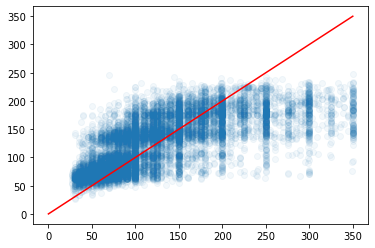

In [ ]:
plt.scatter(x=y_test, y=pred, alpha=0.05)
plt.plot([0,350], [0, 350], 'r-')

# 범주형 데이터에 의존하면 이러한 그림이 나옴

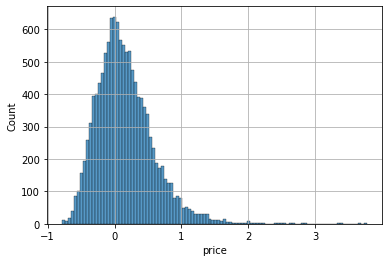

In [ ]:
# 에러율 히스토그램
err = (pred - y_test) / y_test
sns.histplot(err)
plt.grid()

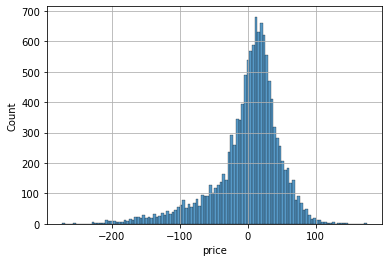

In [ ]:
# 에러값 히스토그램
err = pred - y_test
sns.histplot(err)
plt.grid()